# Summary of HW5: Main Points

Over the course of the following homework you'll walk through a guided tutorial on **Regression** and its uses.

* We'll start with looking at regression on different relations in data (linear, quadratic, etc.).

* Then you'll work on building your own regression tool.

* You'll finish the homework by tying the ideas of these different relations (linear, quadratic) into neural networks to understand **why** we use neural networks.

### Section 1 : Basic Linear Regression (25 points)

Let's begin with **some straightforward linear regression** on some basic datasets. Take a look at the data we are using below.

##### Dataset Preparation (DO NOT MODIFY!)
Below is the essential code for preparing our dataset for analysis. **Please do not alter this code**. Instead, observe and understand the steps being taken.

Once our dataset is ready, we will proceed to train our linear regression model and evaluate how well it explains the data.


The dataset includes:

- (1) "linear" : Synthetic linear data from make_regression
- (2) "convex" : A second-order polynomial Dataset
- (3) "trigonometric" : An S-curve (nonlinear, non-polynomial) created via make_s_curve (we use only the first coordinate)


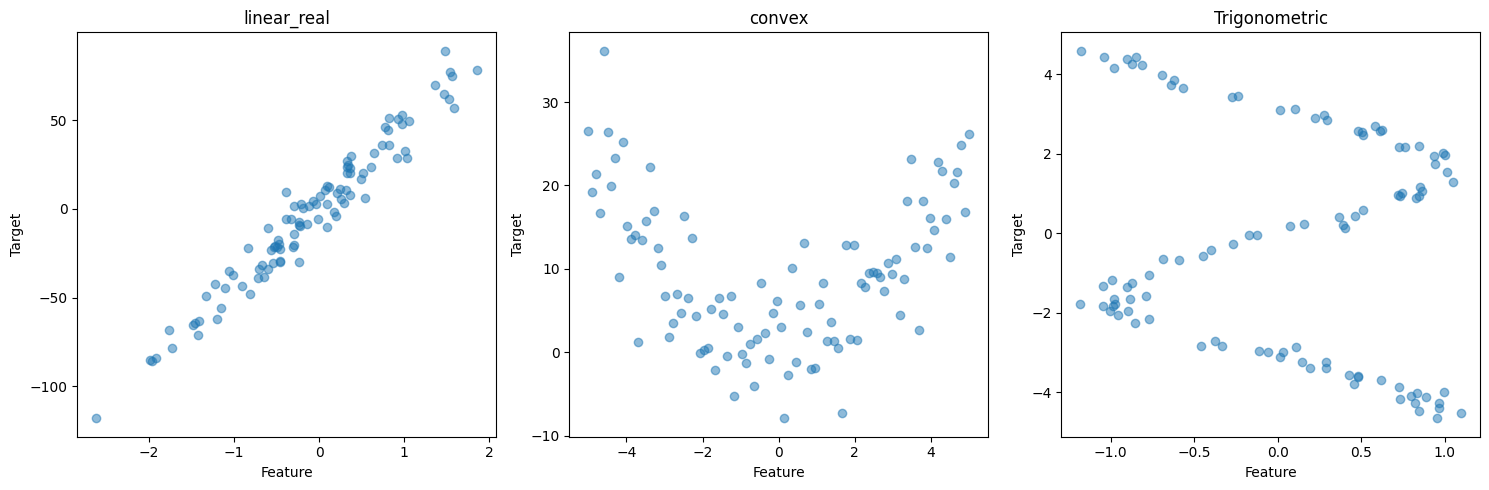

In [2]:
### DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_s_curve

X_linear, y_linear = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# (2) "convex" like dataset
X_convex = np.linspace(-5, 5, 100).reshape(-1, 1)
y_convex = X_convex**2 + np.random.normal(0, 5, size=100).reshape(-1, 1)
y_convex = y_convex.flatten()

# (3) "S-shaped curve" dataset (alternative to trigonometric)
X_s_curve, y_s_curve = make_s_curve(n_samples=100, noise=0.1, random_state=42)
X_s_curve = X_s_curve[:, 0].reshape(-1, 1) # Use only the first feature for simplicity

datasets = {
    "linear_real": (X_linear, y_linear),
    "convex": (X_convex, y_convex),
    "Trigonometric": (X_s_curve, y_s_curve)
}

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each dataset
for ax, dataset in zip(axes, datasets.items()):
    title, (X, y) = dataset
    ax.scatter(X, y, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

plt.tight_layout()
plt.show()
### DO NOT MODIFY

Above, we visualize these datasets for you to gather some ideas about how they look. Look at the visualizations and consider: What are your thoughts on using linear regression to model the non-linear patterns observed in the convex and trigonometric datasets? Do you believe linear regression is adaptable enough to accurately capture these complex relationships? (THIS IS NOT A TASK, JUST A WARM-UP for your thought process before you start working on your tasks next)

##### 1.1. Preparation of Training and Testing Sets (3 pts)

**TASK**: Implement the **split_data** function

We will now divide our three datasets into training and testing sets. For this task, you might want utilize the *train_test_split* function from *sklearn*. This step is crucial for preparing our data for the upcoming linear regression modeling, ensuring that we have separate sets for training our models and evaluating their performance.

In [3]:
# DO NOT MODIFY
from sklearn.model_selection import train_test_split

X_linear, Y_linear = datasets["linear_real"]
X_convex, Y_convex = datasets["convex"]
X_tri, Y_tri = datasets["Trigonometric"]

random_state = 42
np.random.seed(random_state)
test_size = 0.2

def split_data(X, Y, test_size=test_size, random_state=random_state):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
                                                        random_state=random_state)
    return X_train, X_test, Y_train, Y_test

# DO NOT MODIFY
# Apply the function for each dataset
X_linear_train, X_linear_test, Y_linear_train, Y_linear_test = split_data(X_linear, Y_linear)
X_convex_train, X_convex_test, Y_convex_train, Y_convex_test = split_data(X_convex, Y_convex)
X_tri_train, X_tri_test, Y_tri_train, Y_tri_test = split_data(X_tri, Y_tri)

Now, let's **visualize our split dataset**. You can just use the given function to plot each of the dataset.

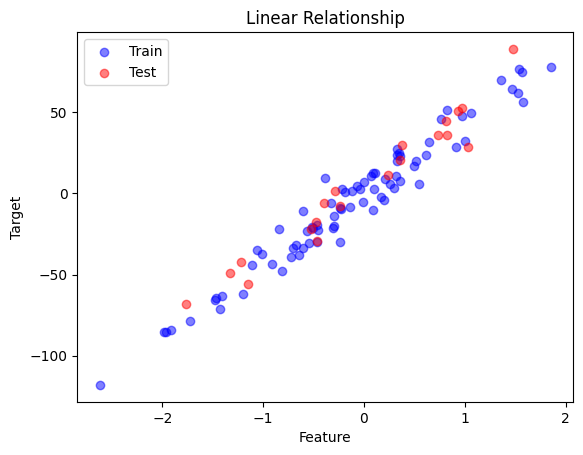

In [4]:
# Set the variable to select the model to plot
selected_dataset = 'Linear'  # Choose between 'Linear', 'Convex', 'Trigonometric'

# DO NOT MODIFY
def draw_scatter(X_train, Y_train, X_test, Y_test, title, xlabel='Feature', ylabel='Target'):
    plt.scatter(X_train, Y_train, color='blue', label='Train', alpha=0.5)
    plt.scatter(X_test, Y_test, color='red', label='Test', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Dictionary to store datasets
datasets = {
    'Linear': (X_linear_train, Y_linear_train, X_linear_test, Y_linear_test, 'Linear Relationship'),
    'Convex': (X_convex_train, Y_convex_train, X_convex_test, Y_convex_test, 'Convex Relationship'),
    'Trigonometric': (X_tri_train, Y_tri_train, X_tri_test, Y_tri_test, 'Trigonometric Relationship')
}

# Extract selected dataset
X_train, Y_train, X_test, Y_test, title = datasets[selected_dataset]

# Plot the selected dataset
draw_scatter(X_train, Y_train, X_test, Y_test, title)

##### 1.2. Linear Regression: Fit a line for the given dataset (6 pts)

**TASK**: Implement the ***fit_model*** and ***predict_data*** functions

You must fit on the training data and then do predictions for both the training and test sets. Use the training prediction for plotting, and the test prediction for evaluation.

*Hint: You can use LinearRegssion from sklearn.linear_model*

In [6]:
from sklearn.linear_model import LinearRegression

# Function to fit the model
def fit_model(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

# Function to predict using the fitted model
def predict_data(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred


# DO NOT MODIFY
# Fit the model for each dataset and predict
linear_model = fit_model(X_linear_train, Y_linear_train)
Y_linear_train_pred, Y_linear_test_pred = predict_data(linear_model, X_linear_train, X_linear_test)
convex_model = fit_model(X_convex_train, Y_convex_train)
Y_convex_train_pred, Y_convex_test_pred = predict_data(convex_model, X_convex_train, X_convex_test)
trigonometric_model = fit_model(X_tri_train, Y_tri_train)
Y_tri_train_pred, Y_tri_test_pred = predict_data(trigonometric_model, X_tri_train, X_tri_test)


Plots below! We'll use the test predictions later.

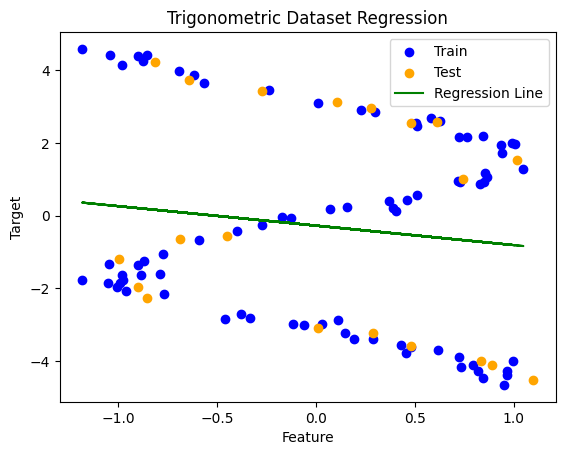

In [7]:
# Set the variable to select the model to plot
selected_dataset = 'Trigonometric'  # Choose between 'Linear', 'Convex', 'Trigonometric'

# DO NOT MODIFY
# Function to draw scatter plot with regression line
def draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title, xlabel='Feature', ylabel='Target'):
    plt.scatter(X_train, Y_train, color='blue', label='Train')
    plt.scatter(X_test, Y_test, color='orange', label='Test')
    plt.plot(X_train, Y_train_pred, color='green', label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Dictionary to store datasets and predictions
datasets = {
    'Linear': (X_linear_train, Y_linear_train, X_linear_test, Y_linear_test, Y_linear_train_pred, 'Linear Dataset Regression'),
    'Convex': (X_convex_train, Y_convex_train, X_convex_test, Y_convex_test, Y_convex_train_pred, 'Convex Dataset Regression'),
    'Trigonometric': (X_tri_train, Y_tri_train, X_tri_test, Y_tri_test, Y_tri_train_pred, 'Trigonometric Dataset Regression')
}

# Extract selected dataset
X_train, Y_train, X_test, Y_test, Y_train_pred, title = datasets[selected_dataset]

# Plot the selected dataset with regression line
draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title)


##### 1.3. Linear Model Evaluation (4 pts)
**TASK**: implement the ***evaluate_model*** function, which calculates the Mean Squared Error (MSE) and $R^2$ coefficient for each training and test split.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate MSE and R^2
def evaluate_model(Y_train, Y_train_pred, Y_test, Y_test_pred):
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)

    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    
    # YOUR CODE HERE
    return mse_train, mse_test, r2_train, r2_test

# DO NOT MODIFY
# Apply the function for each dataset
mse_linear_train, mse_linear_test, r2_linear_train, r2_linear_test = evaluate_model(
    Y_linear_train, Y_linear_train_pred, Y_linear_test, Y_linear_test_pred)

mse_convex_train, mse_convex_test, r2_convex_train, r2_convex_test = evaluate_model(
    Y_convex_train, Y_convex_train_pred, Y_convex_test, Y_convex_test_pred)

mse_tri_train, mse_tri_test, r2_tri_train, r2_tri_test = evaluate_model(
    Y_tri_train, Y_tri_train_pred, Y_tri_test, Y_tri_test_pred)


In [12]:
# DO NOT MODIFY
# List of datasets and their metrics
datasets = ["Linear", "Convex", "Trigonometric"]
mse_train = [mse_linear_train, mse_convex_train, mse_tri_train]
mse_test = [mse_linear_test, mse_convex_test, mse_tri_test]
r2_train = [r2_linear_train, r2_convex_train, r2_tri_train]
r2_test = [r2_linear_test, r2_convex_test, r2_tri_test]

# Function to store and display results
def store_and_display_results(datasets, mse_train, mse_test, r2_train, r2_test):
    results = []
    for i, dataset in enumerate(datasets):
        result = {
            "Dataset": dataset,
            "MSE Train": mse_train[i],
            "MSE Test": mse_test[i],
            "R2 Train": r2_train[i],
            "R2 Test": r2_test[i]
        }
        results.append(result)

        # Display the results
        print(f"{dataset} Dataset:")
        print(f"  MSE Train: {mse_train[i]:.4f}")
        print(f"  MSE Test: {mse_test[i]:.4f}")
        print(f"  R2 Train: {r2_train[i]:.4f}")
        print(f"  R2 Test: {r2_test[i]:.4f}")
        print()  # Blank line for readability

    return results

# Store and display the results
results = store_and_display_results(datasets, mse_train, mse_test, r2_train, r2_test)

Linear Dataset:
  MSE Train: 72.9225
  MSE Test: 104.2022
  R2 Train: 0.9564
  R2 Test: 0.9374

Convex Dataset:
  MSE Train: 74.4721
  MSE Test: 86.9586
  R2 Train: 0.0023
  R2 Test: -0.0388

Trigonometric Dataset:
  MSE Train: 7.3850
  MSE Test: 8.4159
  R2 Train: 0.0198
  R2 Test: 0.0403



##### 1.4. Discussion about the Evaluation Results. (4 pts)

**TASK**: Answer following questions:

<!-- - (1) For each dataset among "Linear", "Convex", and "Trigonometric", does the model perform well based on the MSE and $R^2$ values? Answer "Yes" or "No" for each dataset. -->
- (1) For which dataset(s) does the linear model appear to be a good fit, and for which does it perform poorly? Justify your answer by referring to the metrics.

The linear dataset has a good fit linear model. We can tell this by our high $r^2$ term.

- (2) What does it mean if the $R^2$ coefficient is 0? What does it mean if it is 1? Provide a brief explanation for each case.
  
$R^2$ of 0 means that 0% of the change in the response variable(y) is explained by the change in the predictor variable(x)    
$R^2$ of 0 means that 100% of the change in the response variable(y) is explained by the change in the predictor variable(x)

##### 1.5. Implement Polynomial Features (8 pts)

**TASK**: implement the ***fit_model_poly*** and ***predict_data_poly*** functions

In this section, we'll explore how to use polynomial features to transform non-linear relationships into linear ones, enabling us to apply linear regression effectively. The basic idea is think about non-linear relationships in a higher dimension. But how can we do that? Let's try with polynomial features.


You can think of these features like this...

Consider the following:

* $ y = x^2$ is non linear right?
* What if we said $\alpha = x^2$, so $y = \alpha$?
*Then if you plot $y$ versus $\alpha$ you would get a linear relationship!

Given the provided code below, your task is to implement polynomial regression models for three distinct datasets: linear, convex, and trigonometric to predict outcomes for both training and test data for each dataset :


We recommend using the sklearn ['make_pipeline'](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and ['PolynomialFeatures'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) for this part.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Function to fit the polynomial model
def fit_model_poly(X_train, Y_train, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, Y_train)

    return model

# Function to predict using the fitted polynomial model
def predict_data_poly(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    return Y_train_pred, Y_test_pred

# DO NOT MODIFY
# Define degrees for polynomial features
degree_linear = 1  # For the linear dataset, a degree of 1 is just a linear relationship
degree_convex = 3  # For the convex dataset, let's try a quadratic model
degree_tri = 8    # For the trigonometric dataset, a higher degree might capture the sine/cosine waves

# Fit and predict for the linear dataset
linear_model_poly = fit_model_poly(X_linear_train, Y_linear_train, degree_linear)
Y_linear_train_pred_poly, Y_linear_test_pred_poly = predict_data_poly(linear_model_poly, X_linear_train, X_linear_test)

# Fit and predict for the convex dataset
convex_model_poly = fit_model_poly(X_convex_train, Y_convex_train, degree_convex)
Y_convex_train_pred_poly, Y_convex_test_pred_poly = predict_data_poly(convex_model_poly, X_convex_train, X_convex_test)

# Fit and predict for the trigonometric dataset
trigonometric_model_poly = fit_model_poly(X_tri_train, Y_tri_train, degree_tri)
Y_tri_train_pred_poly, Y_tri_test_pred_poly = predict_data_poly(trigonometric_model_poly, X_tri_train, X_tri_test)


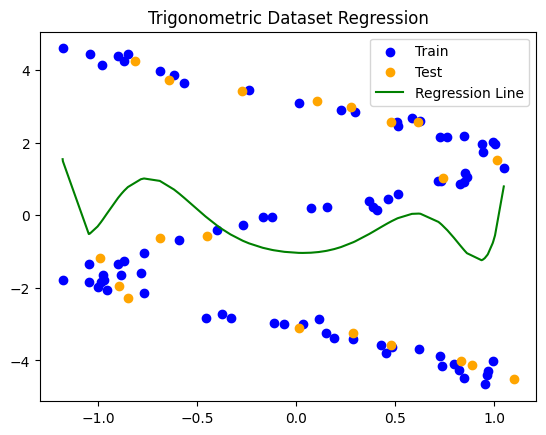

In [19]:
# Set the variable to select the model to plot
selected_dataset = 'Trigonometric'  # Choose between 'Linear', 'Convex', 'Trigonometric'

# DO NOT MODIFY
# Function to plot dataset with regression line
def plot_dataset_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title):
    sorted_idx = np.argsort(X_train.ravel())
    plt.scatter(X_train, Y_train, color='blue', label='Train')
    plt.scatter(X_test, Y_test, color='orange', label='Test')
    plt.plot(X_train[sorted_idx], Y_train_pred[sorted_idx], color='green', label='Regression Line')
    plt.title(title)
    plt.legend()
    plt.show()

# Dictionary to store datasets and predictions
datasets = {
    'Linear': (X_linear_train, Y_linear_train, X_linear_test, Y_linear_test, Y_linear_train_pred_poly, 'Linear Dataset Regression'),
    'Convex': (X_convex_train, Y_convex_train, X_convex_test, Y_convex_test, Y_convex_train_pred_poly, 'Convex Dataset Regression'),
    'Trigonometric': (X_tri_train, Y_tri_train, X_tri_test, Y_tri_test, Y_tri_train_pred_poly, 'Trigonometric Dataset Regression')
}

# Extract selected dataset
X_train, Y_train, X_test, Y_test, Y_train_pred, title = datasets[selected_dataset]

# Plot the selected dataset with regression line
plot_dataset_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title)


In [20]:
# DO NOT MODIFY

# Calculate for all datasets
mse_linear_train_poly, mse_linear_test_poly, r2_linear_train_poly, r2_linear_test_poly = evaluate_model(
    Y_linear_train, Y_linear_train_pred_poly, Y_linear_test, Y_linear_test_pred_poly)

mse_convex_train_poly, mse_convex_test_poly, r2_convex_train_poly, r2_convex_test_poly = evaluate_model(
    Y_convex_train, Y_convex_train_pred_poly, Y_convex_test, Y_convex_test_pred_poly)

mse_tri_train_poly, mse_tri_test_poly, r2_tri_train_poly, r2_tri_test_poly = evaluate_model(
    Y_tri_train, Y_tri_train_pred_poly, Y_tri_test, Y_tri_test_pred_poly)

# Print the MSE and R^2 values for both training and testing sets for each dataset with polynomial features
print("Linear Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_linear_train_poly:.4f}, R^2: {r2_linear_train_poly:.4f}")
print(f"Test - MSE: {mse_linear_test_poly:.4f}, R^2: {r2_linear_test_poly:.4f}\n")

print("Convex Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_convex_train_poly:.4f}, R^2: {r2_convex_train_poly:.4f}")
print(f"Test - MSE: {mse_convex_test_poly:.4f}, R^2: {r2_convex_test_poly:.4f}\n")

print("Trigonometric Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_tri_train_poly:.4f}, R^2: {r2_tri_train_poly:.4f}")
print(f"Test - MSE: {mse_tri_test_poly:.4f}, R^2: {r2_tri_test_poly:.4f}\n")

Linear Dataset with Polynomial Features:
Train - MSE: 72.9225, R^2: 0.9564
Test - MSE: 104.2022, R^2: 0.9374

Convex Dataset with Polynomial Features:
Train - MSE: 26.5406, R^2: 0.6444
Test - MSE: 26.4375, R^2: 0.6842

Trigonometric Dataset with Polynomial Features:
Train - MSE: 7.0789, R^2: 0.0604
Test - MSE: 10.6519, R^2: -0.2147



### Section 2: Linear Regression Model Design (30 points)

The mean-squared error loss is one of the basic loss that can be used for linear regression.

$$L_\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\hat{Y}_i - Y_i)^2$$
$$\hat{Y}_i = \theta_1 X_i + \theta_2$$

Reminder: $\frac{\partial f}{\partial x}$ means taking the derivative of $f$ with respect to $x$, assuming ALL other variables are constants.

Sources:

https://tutorial.math.lamar.edu/classes/calciii/partialderivatives.aspx

https://tutorial.math.lamar.edu/classes/calci/DerivativeIntro.aspx



##### 2.1. Derive the gradients $\frac{\partial L}{\partial\theta_1}, \frac{\partial L}{\partial\theta_2}$ (5 pts).



**Student Response** (preferred latex, equation must be readable)



**ANSWER:**


##### 2.2 Implement our SimpleLinearRegression class (12 pts)





**TASK**: Your task is to complete the implementation of a Simple Linear Regression model using gradient descent from scratch.

You may have to follow these steps: <br>

* Initialize model parameters.
* Implement gradient descent to iteratively update the model parameters.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, iterations=1000, learning_rate=0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.m = 0
        self.b = 0
        
    def fit(self, X, Y):
        samples = X.shape[0]
        
        self.m = np.zeros(samples)
        self.b = 0
        
        for _ in range(self.iterations):
            # Predict it
            y_pred = np.dot(X, self.m) + self.b

            dm = (1 / samples) * np.dot(X.T, (y_pred - Y))
            db = (1 / samples) * np.sum(y_pred - Y) 
            
            self.m -= self.learning_rate * dm 
            self.b -= self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.m) + self.b
        return np.array(y_pred)

The following code will test your implementation.

samples are 40
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan] and nan


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

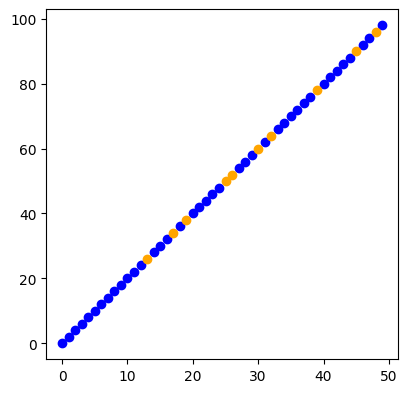

In [50]:
### DO NOT MODIFY
def test_linear_regression(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    metric = max(Y_test)


    relative_error = np.mean(np.abs((Y_test - predictions)/metric))
    return relative_error < 0.05

datasets = [
   (np.arange(0, 50), np.arange(0, 50)*2),
    (np.arange(10, 50), np.arange(10, 50)**2),
   (np.array([0, 0, 1, 1, 0.25, 0.25, 0.75, 0.75, 0.5]), np.array([0, 1, 1, 0, 0.25, 0.75, 0.75, 0.25, 0.5])),
    (np.arange(40, 80), np.arange(40,80)*5 + np.random.normal(0, 15, 40).clip(-10, 10))
]

datasets = [split_data(X, Y, 0.2) for X, Y in datasets]

# Visualize regression
def visualize_datasets(datasets, titles):
    plt.figure(figsize=(10, 10))
    for idx, dataset in enumerate(datasets):
        X_train, X_test, Y_train, Y_test = dataset

        model = SimpleLinearRegression(iterations=6000, learning_rate=1e-4)
        model.fit(X_train, Y_train)

        print(f'{model.m} and {model.b}')
        
        Y_train_pred = model.predict(X_train)
        
        sorted_idx = np.argsort(X_train.ravel())
        plt.subplot(2, 2, idx + 1)
        plt.scatter(X_train, Y_train, color='blue', label='Train')
        plt.scatter(X_test, Y_test, color='orange', label='Test')
        plt.plot(X_train[sorted_idx], Y_train_pred[sorted_idx], color='green', label='Regression Line')
        plt.title(titles[idx])
        plt.legend()

    plt.tight_layout()
    plt.show()

titles = ["Linear", "Cubic", "XOR", "Linear + Noise"]
visualize_datasets(datasets, titles)

# Test each dataset
results = [test_linear_regression(SimpleLinearRegression(iterations=10000, learning_rate=1e-4), *dataset) for dataset in datasets]
answers = [True, False, False, True]
if results == answers:
  print("Good job!")
else:
  print("Wrong Implmentation! Your linear regression model needs more testing!")
  assert(False)

### DO NOT MODIFY

##### 2.3 Implement multi-variate linear regression pipeline. (8 pts)
**TASK**:
- Implement your *LinearRegression* model, which is multi-variate version of *SimpleLinearRegression* model from Q.2.2
- Design your pipeline to learn the given traffic dataset with polynomial features.
- Predict the traffic volume for 6 AM and 6 PM.

**Hints**:
- You can integrate **StandardScaler** into your model pipeline. If the dataset is normalized, the model can learn the dataset more effectively.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### DO NOT MODIFY: Dataset Preparation
num_samples = 800
X = np.linspace(0, 24, num_samples)
x_norm = (X - 12) / 12
Y = (200 - 500 * x_norm**4 + 1800 * x_norm**2 + 500 * x_norm**3) * 50  #+ np.random.normal(0, 500.0, num_samples).clip(-2000, 2000)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

class LinearRegression:
    def __init__(self, iterations=1000, learning_rate=0.1):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.weights = None  # will be initialized in fit
        self.bias = 0.0

    def fit(self, X, Y):
        X = np.asarray(X)
        Y = np.asarray(Y).reshape(-1, 1)
        n, d = X.shape

        ### YOUR CODE HERE
        self.weights =

        for iter in range(self.iterations):
            ### YOUR CODE HERE
            self.weights -=
            self.bias -=

        return self

    def predict(self, X):
        X = np.asarray(X)
        return np.dot(X, self.weights) + self.bias


### YOUR CODE HERE
model = make_pipeline()
model.fit(X_train.reshape(-1, 1), Y_train)

The following code will visualize your regression results. Use the model to predict the traffic volume for 6 AM and 6 PM.

In [ ]:
### DO NOT MODIFY
traffic_at_8am = model.predict(np.array([[8]]))
traffic_at_9pm = model.predict(np.array([[21]]))

print("Traffic at 8 AM: ", traffic_at_8am.item())
print("Traffic at 9 PM: ", traffic_at_9pm.item())

def plot_regression_line(model, X, Y):
    # Predict values using the fitted model
    X = X.reshape(-1, 1)
    Y_pred = model.predict(X)

    # Plot the actual data and the fitted regression line
    plt.scatter(X, Y, color='blue', label='Actual Data')
    plt.plot(X, Y_pred, color='red', label='Fitted Line')
    plt.title('Traffic Volume Prediction Using Regression')
    plt.xlabel('Time of Day (hours)')
    plt.ylabel('Traffic Volume (vehicles/hour)')
    plt.legend()
    plt.show()

plot_regression_line(model, X_train, Y_train)
print("Predicted traffic volume at 8 AM:", traffic_at_8am)
print("Predicted traffic volume at 9 PM:", traffic_at_9pm)


##### 2.4. Calculate the Exact Solution to the Linear Regressor (5 points)



Derive exact solution for $\theta$ when $$L = \frac{1}{N} (X \theta - y)^T (X \theta - y))$$

This is for multidimensional linear regression, and is the exact solution overall. Your answer should be the solution for $\theta$ that results in the **minimal value for the loss**. This is ideally the value that all gradient descent approaches would converge to during linear regression gradient descent.

Hint: this [matrix derivative sheet](https://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) may be helpful

**Student response here** (preferred latex, equation must be readable)

### Section 3: Neural Networks (25 points)

In the final test, and meat of the homework, we want you to perform a real world regression all on your own. You know the fundamental underlying ideas, so let's use some real world libraries and methods to actually do regression on a **real** dataset.

We'll be using pytorch for this next section. Look at (https://pytorch.org/tutorials/beginner/basics/intro.html) for a run down on pytorch basics.


##### 3.1. Preparation of Data Loaders (10 pts)

**TASK**: Prepare **train_loader** and **test_loader**.

**Requirements**:
- Use **train_test_split** to set aside **20%**of the entire dataset as the test set.
- Set the **batch size** to **32** for both loaders.
- Normalize the dataset using StandardScaler to make it **zero mean** and **unit variance** for each feature dimension.
- Ensure that **train_loader** samples the dataset randomly (refer to the **shuffle** argument in DataLoader).
- Set **batch_size**, **num_train_data**, **num_test_data**, **feat_dim** values from your train/test loaders. **num_X_data** refers to the number of data samples, not the number of batches. **DO NOT HARDCODE THESE VALUES**



In [ ]:
### DO NOT MODIFY HERE!
# from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

# Load the data
housing = fetch_openml(name="house_prices", as_frame=True)
X, y = housing.data, housing.target

In [ ]:
### YOUR ANSWER HERE

# Split the data

# Normalize the data

# Convert to PyTorch tensors
X_train_tensor =
y_train_tensor =
X_test_tensor =
y_test_tensor =

# Create data loaders
train_dataset =
test_dataset =

batch_size = 32

### DO NOT MODIFY BELOW
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

batch_size = train_loader.batch_size
num_train_data = len(train_loader) * batch_size
num_test_data = len(test_loader) * batch_size
feat_dim = train_loader.dataset[0][0].shape[0]

In [ ]:
### DO NOT MODIFY HERE!
try:
    assert(type(train_loader) == DataLoader)
    assert(type(test_loader) == DataLoader)
except:
    print('"train_loader" and "test_loader" must be DataLoader type!')

print("Batch Size:", batch_size)
print("Number of Train Data:", num_train_data)
print("Number of Test Data:", num_test_data)
print("Feature Dimension:", feat_dim)

##### 3.2. Define Multi-Layer Perceptron Model (5 pts)

**TASK**: Implement the **MLPModel** and instantiate
 the **model** variable.

**Requirements**:
- The MLP model consists of three fully-connected linear layers.
- Use **relu** activation functions between each layer
- Do not apply the activation function to the final output. (It should directly come from the linear layer. Why? Think about it)

In [ ]:
### YOUR ANSWER HERE
class MLPModel(nn.Module):
    def __init__(self, feat_dim):
        super(MLPModel, self).__init__()
        ### YOUR CODE HERE.
        ### 3-layer fully connected neural network.

    def forward(self, x):
        ### YOUR CODE HERE.
        return

# Instantiate the model
model = MLPModel(feat_dim=X_train.shape[1])

In [ ]:
### DO NOT MODIFY HERE!
try:
    assert(type(model) == MLPModel)
except:
    print('"model" must be MLPModel type!')

num_layers = len(list(model.children()))
input_dim = list(model.children())[0].in_features
output_dim = list(model.children())[-1].out_features

print("Number of Layers:", num_layers)
print("Input Dimension:", input_dim)
print("Output Dimension:", output_dim)

##### 3.3. Implement the MLP Training Loop (10 pts)

**TASK**: Implement the training loop with adequate loss function and optimizer.

**Requirements**:
- Use the **Adam** optimizer and the **MSELoss** function.
- Your training training loop should implement both the forward pass (calculating losses) and the backward pass(zeroing the gradient and updating the parameters from the loss gradients)

In [ ]:
### YOUR ANSWER HERE
criterion =
optimizer =


epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        ### YOUR ANSWER HERE
        # Forward pass

        # Backward pass

    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

print('Finished Training')

In [ ]:
### DO NOT MODIFY HERE!
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

### Section 4 : Can Regression do Classification? (15 points)
Starting at the beginning, linear models are the simplest type of model possible. They imply that our data, when graphed in a mathematical basis, can be separated by a curve that is a line (in 2 dimensions), a plane (in 3 dimensions), or a hyperplane (> 3 dimensions).


What about using what we've done for classification? Can we apply our newfound regression skills to classify things? Let's try! You already have a lot of knowledge about classification, so some of the basics from the last homework will not be repeated.

Consider the following plot

In [ ]:
### DO NOT MODIFY
x_axis = np.linspace(0, 1, 100)
class_a = 2 * x_axis + 1 + np.random.normal(1, 0.2, x_axis.shape[0])
class_b = 2 * x_axis + 1 + np.random.normal(-1, 0.2, x_axis.shape[0])

plt.scatter(x_axis, class_a, color='r', label='Class A')
plt.scatter(x_axis, class_b, color='b', label='Class B')
plt.legend()

There is a very evident line that separates our classes here, one that we humans could easily draw by hand. The goal of classification is to get a computer to find this for us!

#### 4.1: Logistic Regression (10 points)

In classification tasks, the objective is to find a decision boundary that separates data points belonging to different classes. Unlike linear regression, which predicts continuous values, classification involves discrete class labels. Therefore, the model must incorporate class information during training.

A linear function is first defined as:

$$
f(x) = wx + b
$$

where:
- $w$ represents the slope,
- $b$ is the bias or intercept,
- $x$ is the input feature (or feature vector in the multivariate case).

To produce binary outputs, the following function is used to map the output of \( f(x) \) to class labels:

$$
y(x) =
\begin{cases}
1 & \text{if } f(x) > 0 \\
0 & \text{otherwise}
\end{cases}
$$

Here, the output 1 corresponds to one class (e.g., class A), and 0 corresponds to the other (e.g., class B).

The function can be parameterized using trainable variables $\theta_1$ and $\theta_2$:

$$
f(x; \theta) = \theta_1 x + \theta_2
$$

This linear model defines a family of decision boundaries. It is assumed that an optimal set of parameters $\theta^*$ exists such that the corresponding line $f^*(x; \theta^*)$ separates the classes effectively.

To learn the parameters, a loss function must be defined. For binary classification, the [logistic (cross-entropy) loss](https://medium.com/intro-to-artificial-intelligence/logistic-regression-using-gradient-descent-bf8cbe749ceb) is used:

$$
L_\text{logistic} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:
- $y_i$ $\in$ $\{0, 1\}$ is the true class label for sample $i$,
- $\hat{y}_i$ is the predicted probability of class 1 for sample $i$, defined as:

$$
\hat{y}_i = \sigma(\theta_1 x_i + \theta_2), \quad \text{where } \sigma(z) = \frac{1}{1 + e^{-z}}
$$

The [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) $\sigma(z)$ maps any real-valued input into the range (0, 1), making it suitable for probability interpretation.

The term $ f(x) = \theta_1 x + \theta_2 $ used earlier is directly related to this formulation, as it forms the input to the sigmoid function:

$$
\hat{y}_i = \sigma(f(x)) = \frac{1}{1 + e^{-f(x)}}
$$

To minimize the loss function, gradient descent is used. The gradients of the loss with respect to the parameters are given by:

$$
\frac{\partial L}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) x_i
$$

$$
\frac{\partial L}{\partial \theta_2} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
$$

TASK: Fill in the gradient update step in fit method of SimpleLogisticRegression

In [ ]:

class SimpleLogisticRegression:
    def __init__(self, iterations=1000, learning_rate=0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.w = None # weights are set in fit method
        self.b = 0.0

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        X = X.reshape(X.shape[0], -1)
        Y = Y.reshape(-1, 1)
        n_samples, n_features = X.shape

        self.w = np.zeros((n_features, 1))

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.w) + self.b
            y_pred = self._sigmoid(linear_model)

            ### YOUR CODE HERE
            dw =
            db =

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X, threshold=0.5):
        X = X.reshape(X.shape[0], -1)
        linear_model = np.dot(X, self.w) + self.b
        probability = self._sigmoid(linear_model)
        return (probability >= threshold).astype(int)


Do not modify the below code block! Make sure you display the output of this block!

In [ ]:
### DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt

### DO NOT MODIFY
np.random.seed(0)
num_samples = 100

X0 = np.random.multivariate_normal([3, 3], [[1, -0.8],
                                            [-0.8, 1]], num_samples)
Y0 = np.zeros((num_samples, 1))
X1 = np.random.multivariate_normal([5, 5], [[1, -0.8],
                                            [-0.8, 1]], num_samples)
Y1 = np.ones((num_samples, 1))

X = np.vstack((X0, X1))
Y = np.vstack((Y0, Y1))

# Train the logistic regression model
model = SimpleLogisticRegression(iterations=1000, learning_rate=0.1)
model.fit(X, Y)

# Predict
preds = model.predict(X)

# Plot the dataset and decision boundary
def plot_decision_boundary(X, Y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[Y.ravel() == 0][:, 0], X[Y.ravel() == 0][:, 1], color='green', label='Class 0')
    plt.scatter(X[Y.ravel() == 1][:, 0], X[Y.ravel() == 1][:, 1], color='red', label='Class 1')

    # Decision boundary
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(model.w[0] * x_values + model.b) / model.w[1]
    plt.plot(x_values, y_values.ravel(), label='Decision Boundary', color='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(X, Y, model)


##### Handling More complicated data?

Excellent! We can classify data using a linear plane, and it's merely a mathematical exercise to extend this concept to higher dimensions.I.e. all the partials you computed earlier, now you just end up with more partial derivatives.

You have partial derivatives with each of the dimensions as you have a linear component in each of the dimensions.

Technically you also have 'y-intercepts' for each of the dimensions as well, but they can be combined into one constant term. This gives you $d+1$ weights to tune, where $d$ is the dimensionality of the X data.

But... what about this?

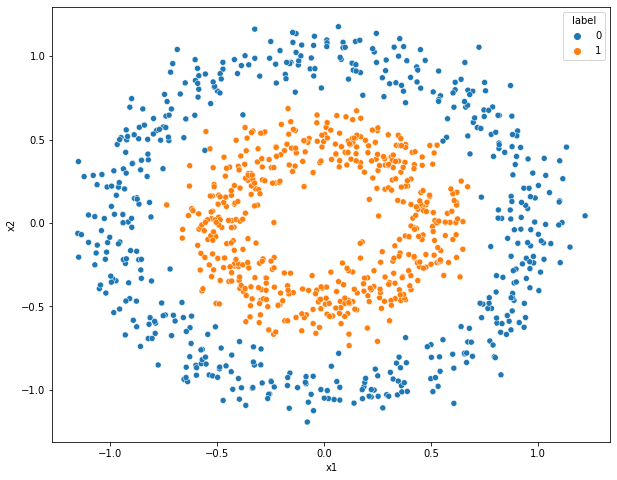

No good solution now...

What about this instead?

In [ ]:
### DO NOT MODIFY
m_star = 0.6
b_star = 0.05

x_data_full = np.linspace(0, 1, 1000)
y_data_full = m_star * x_data_full + b_star + np.random.normal(0, 0.05,
                                                          x_data_full.shape[0])
y_data_full = x_data_full ** 2

class_a = x_data_full ** 2 + np.random.normal(0.5, 0.1, x_data_full.shape[0])
class_b = x_data_full ** 2 + np.random.normal(0, 0.1, x_data_full.shape[0])

plt.scatter(x_data_full, class_a, color='g')
plt.scatter(x_data_full, class_b, color='r')

No good. We can't separate data that looks like that. Not linearly anyway.

BUT! What if we redefine our basis? Instead of our y direction being linear in x, what if it was $x^2$?

In [ ]:
x_squared = x_data_full ** 2

plt.scatter(x_squared, class_a, color='g')
plt.scatter(x_squared, class_b, color='r')

plt.xlabel('x squared')

Hey look! It's linear! What does this mean? By casting into higher dimensional spaces through a **kernel function**, we can linearly separate our data.

Of course we chose a very simple kernel.

But for more complex data there are a variety of kernels. Go look some up! **'Kernel trick SVM'** should give you plenty of great resources.


##### 4.2: Kernel Trick (5 points)

TASK: List some different kernels you found online, their names.

*Your Answer Here*